In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#------------------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, LSTM, GRU, RNN, Flatten, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, BatchNormalization, Dropout, LeakyReLU, ELU, PReLU
from tensorflow.keras.activations import tanh, relu, sigmoid, softmax, swish
from tensorflow.keras.regularizers import L1, L2, L1L2
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam, Adamax, Nadam
from tensorflow.keras.initializers import HeNormal, HeUniform, GlorotNormal, GlorotUniform
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy, hinge, MSE, MAE, Huber
#------------------------------------------------
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, f1_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV 
#------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [29]:
df = pd.read_csv('Hotel Reservations.csv')
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


# Exploration The Data
- Using various data visualization techniques to understand the distribution of the data
- Getting a sense of the relationships between different attributes
- Identifying any missing or outliers

In [30]:

cleandf = df[['lead_time','avg_price_per_room','no_of_special_requests','arrival_date','arrival_month','market_segment_type','no_of_week_nights','booking_status']]

In [31]:
cleandf

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights,booking_status
0,224,65.00,0,2,10,Offline,2,Not_Canceled
1,5,106.68,1,6,11,Online,3,Not_Canceled
2,1,60.00,0,28,2,Online,1,Canceled
3,211,100.00,0,20,5,Online,2,Canceled
4,48,94.50,0,11,4,Online,1,Canceled
...,...,...,...,...,...,...,...,...
36270,85,167.80,1,3,8,Online,6,Not_Canceled
36271,228,90.95,2,17,10,Online,3,Canceled
36272,148,98.39,2,1,7,Online,6,Not_Canceled
36273,63,94.50,0,21,4,Online,3,Canceled


In [32]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = cleandf.select_dtypes(include='object').columns
le = LabelEncoder()
cleandf[categorical_cols] = cleandf[categorical_cols].apply(lambda col: le.fit_transform(col))    

In [33]:
from sklearn.preprocessing import MinMaxScaler
one_hot_scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(cleandf), columns=cleandf.columns)

In [34]:
X = one_hot_scaled_df.drop(['booking_status'], axis=1)
y = one_hot_scaled_df['booking_status']

In [28]:
one_hot_scaled_df.to_csv('clean_data.csv',index=False)

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1)

In [63]:
a = X_test.iloc[100].to_numpy()

In [64]:
a

array([0.11963883, 0.32833333, 0.4       , 0.66666667, 0.27272727,
       1.        , 0.17647059])

In [62]:
y_test.iloc[100]

1.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
for col in df:
    uniq = df[col].unique()
    uniq.sort()
    print(col, "\n", uniq)
    print("------------------------------------------------------------------")

Booking_ID 
 ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
------------------------------------------------------------------
no_of_adults 
 [0 1 2 3 4]
------------------------------------------------------------------
no_of_children 
 [ 0  1  2  3  9 10]
------------------------------------------------------------------
no_of_weekend_nights 
 [0 1 2 3 4 5 6 7]
------------------------------------------------------------------
no_of_week_nights 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
------------------------------------------------------------------
type_of_meal_plan 
 ['Meal Plan 1' 'Meal Plan 2' 'Meal Plan 3' 'Not Selected']
------------------------------------------------------------------
required_car_parking_space 
 [0 1]
------------------------------------------------------------------
room_type_reserved 
 ['Room_Type 1' 'Room_Type 2' 'Room_Type 3' 'Room_Type 4' 'Room_Type 5'
 'Room_Type 6' 'Room_Type 7']
-----------------------------

In [67]:
df.drop(['Booking_ID'], axis = 1, inplace = True)

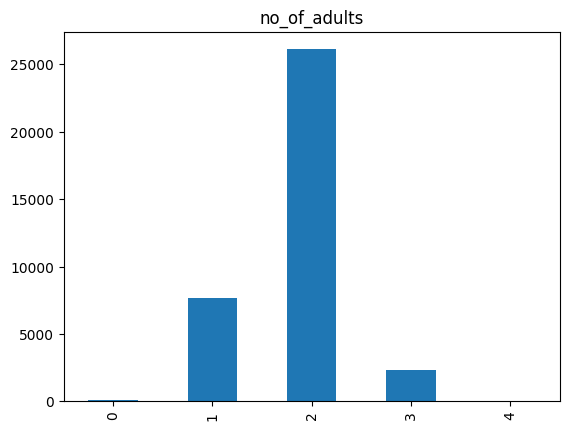

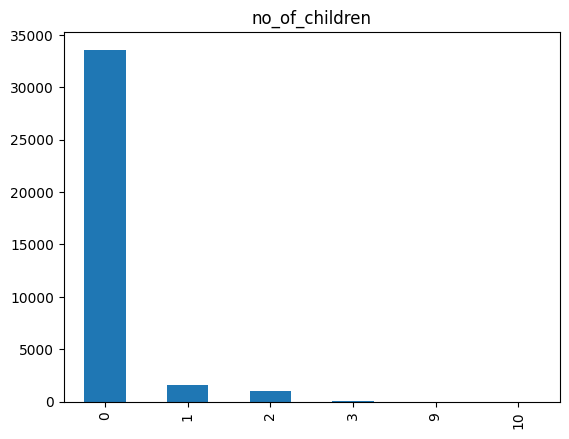

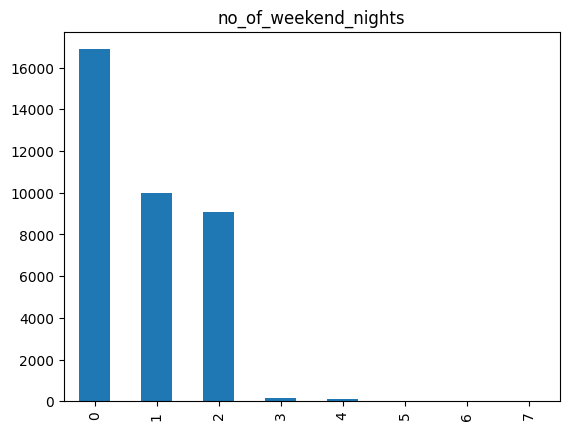

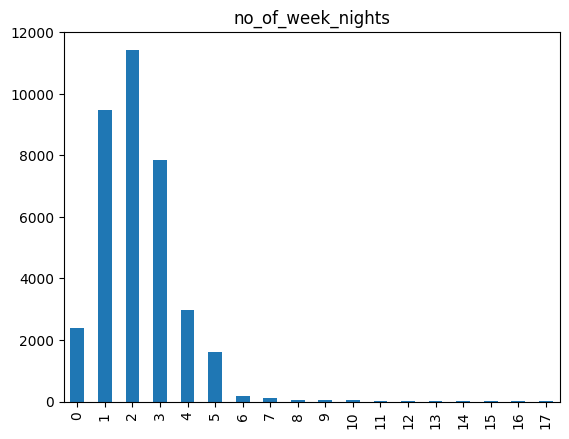

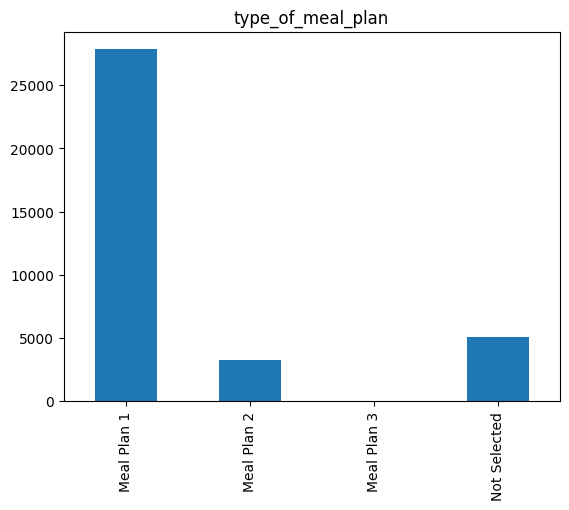

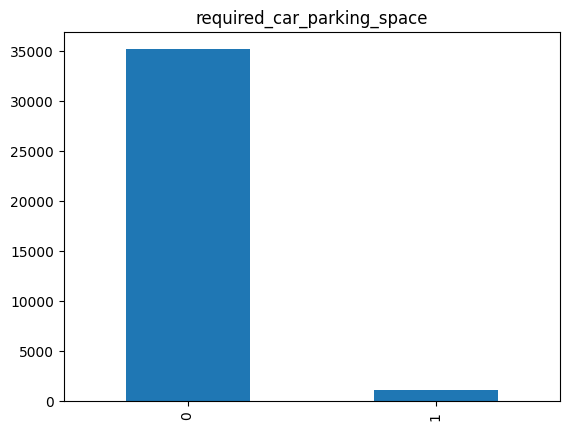

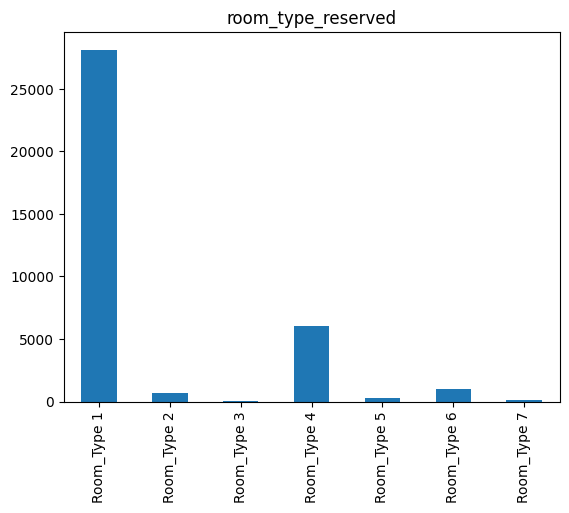

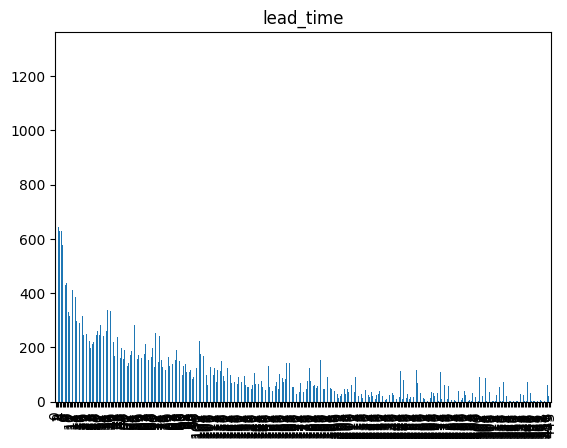

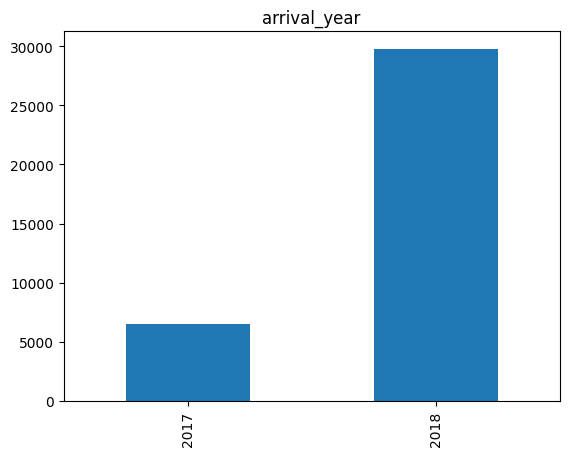

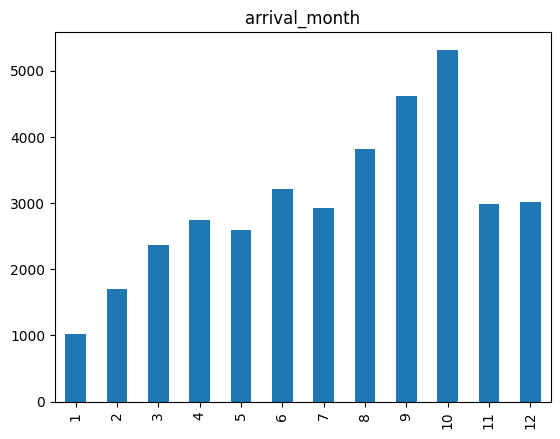

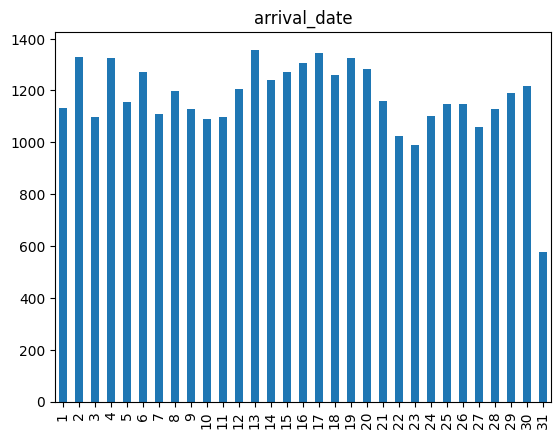

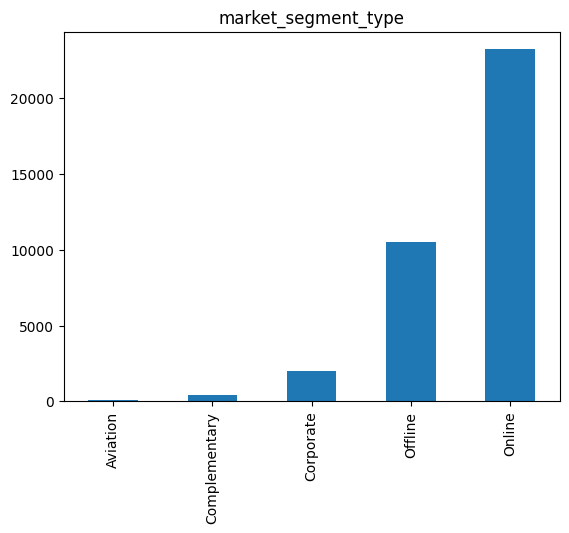

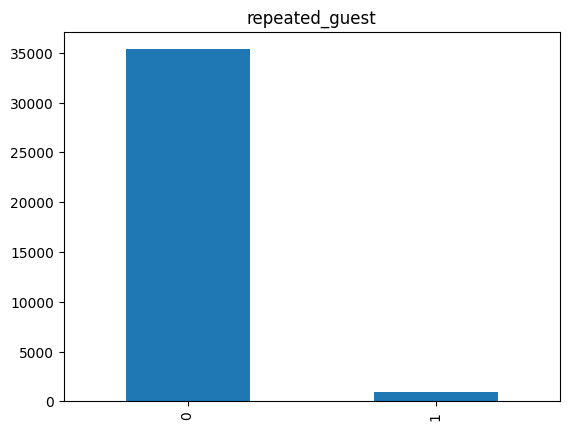

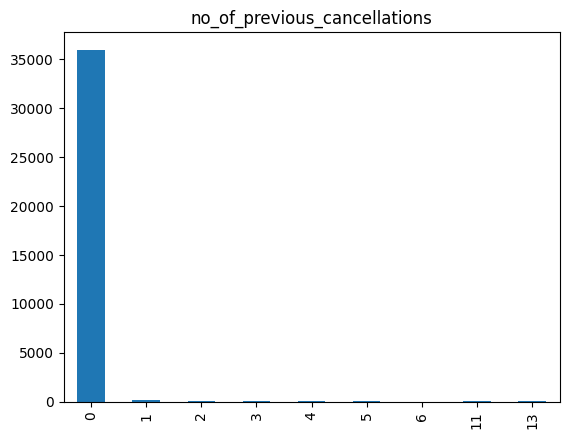

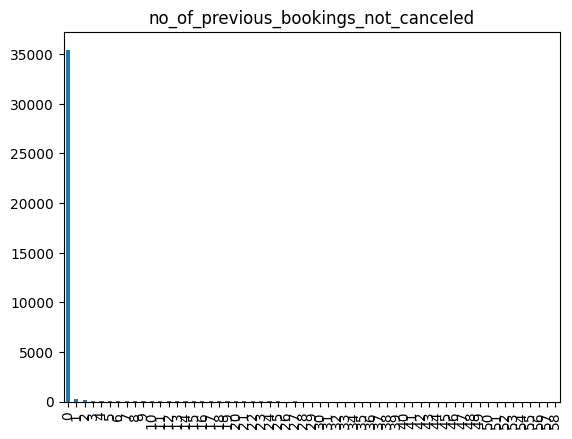

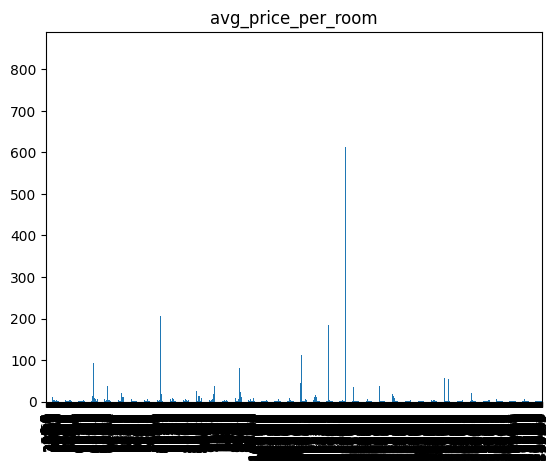

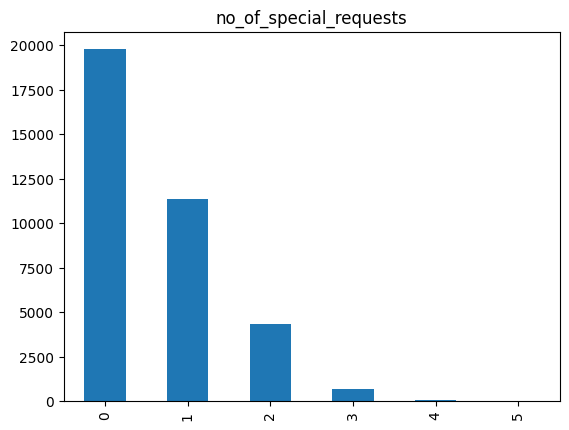

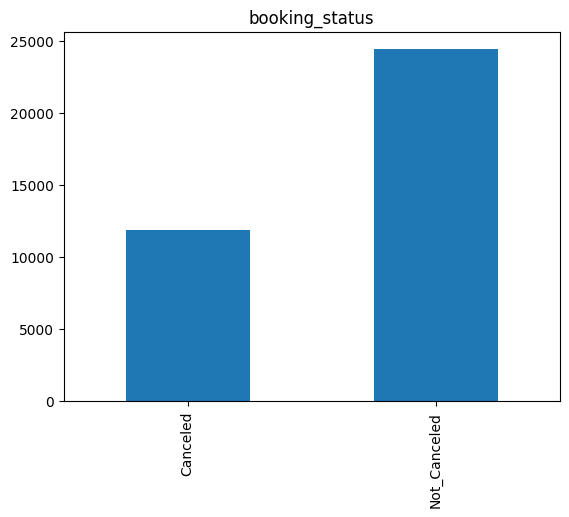

In [ ]:
for col in df:
    df[col].value_counts().sort_index().plot(kind = 'bar', title=col)
    plt.show()

### Relationships Between Different Attributes

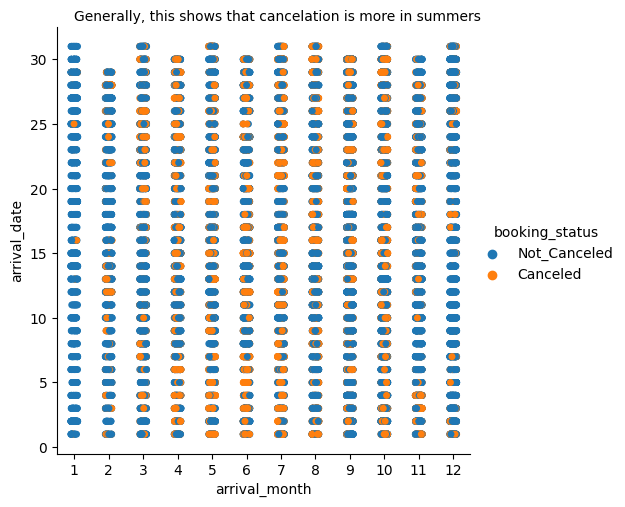

In [ ]:
sns.catplot(x = 'arrival_month', y = 'arrival_date', hue = 'booking_status', data = df)
plt.text(0, 33, 'Generally, this shows that cancelation is more in summers')
plt.show()

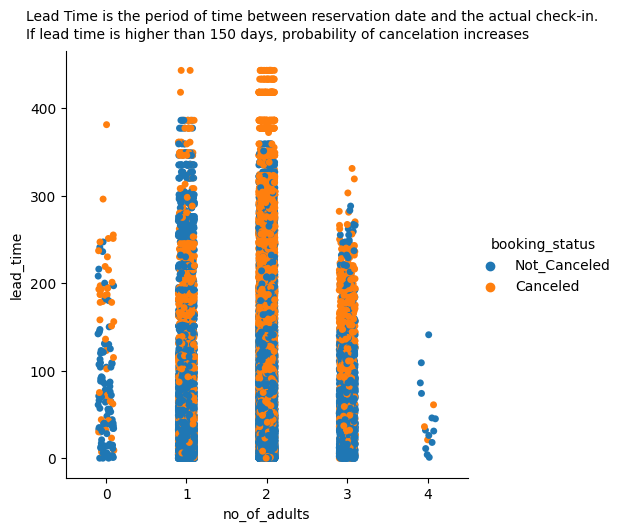

In [ ]:
sns.catplot(x = 'no_of_adults', y = 'lead_time', hue = 'booking_status', data = df)
plt.text(-1, 500, 'Lead Time is the period of time between reservation date and the actual check-in.')
plt.text(-1, 480, 'If lead time is higher than 150 days, probability of cancelation increases')
plt.show()

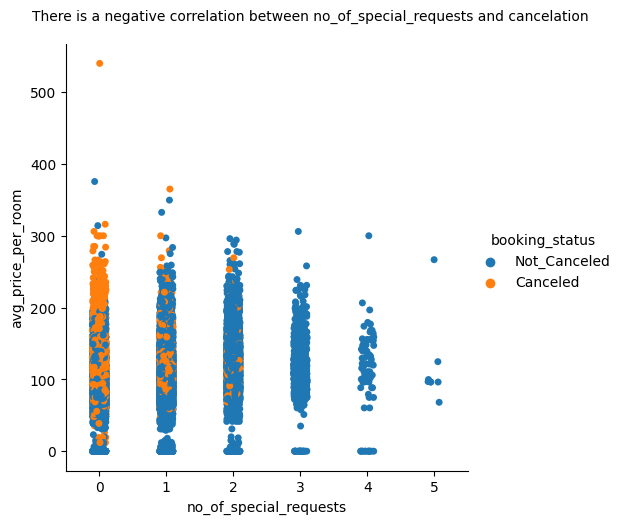

In [ ]:
sns.catplot(x = 'no_of_special_requests', y = 'avg_price_per_room', hue = 'booking_status', data = df)
plt.text(-1, 600, 'There is a negative correlation between no_of_special_requests and cancelation')
plt.show()

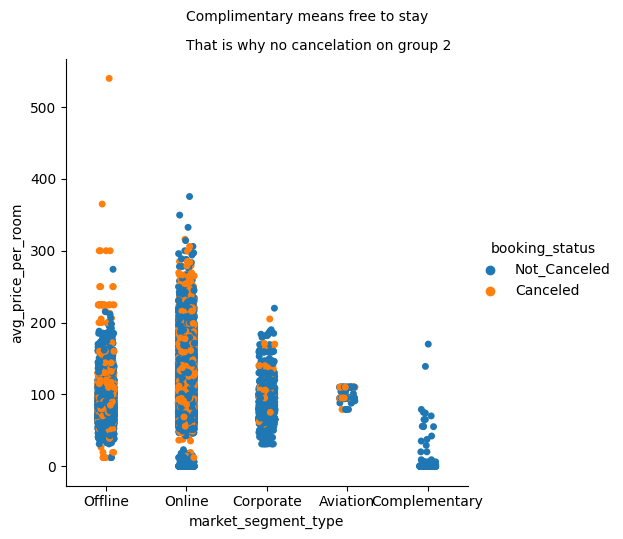

In [ ]:
sns.catplot(x = 'market_segment_type', y = 'avg_price_per_room', hue = 'booking_status', data = df)
plt.text(1, 620, 'Complimentary means free to stay')
plt.text(1, 580, 'That is why no cancelation on group 2')
plt.show()

# Label Encoding and Correlation Matrix

In [68]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))    

Text(0.5, 1.0, 'Columns Correlation')

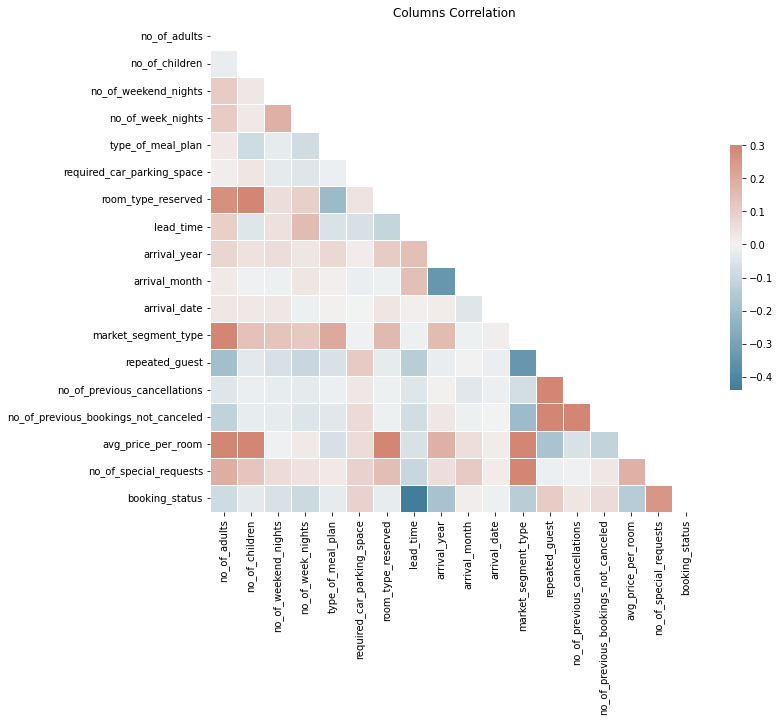

In [69]:
# check correlation
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Columns Correlation")

# Checking Outliers

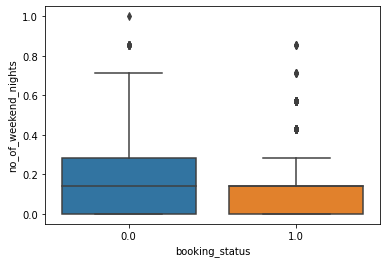

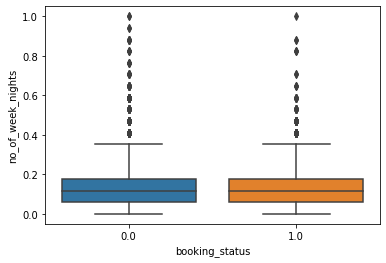

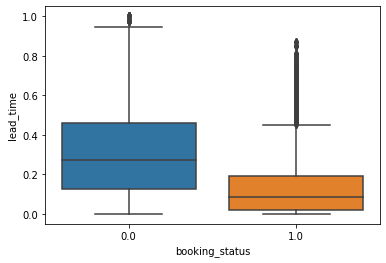

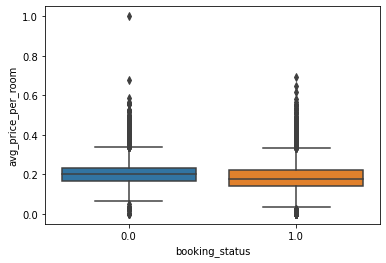

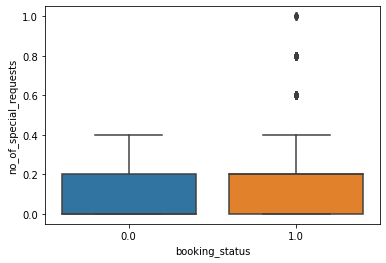

In [70]:
outlierCols =  ['no_of_weekend_nights',
                'no_of_week_nights',
                'lead_time',
                'avg_price_per_room',
                'no_of_special_requests']

from sklearn.preprocessing import MinMaxScaler
one_hot_scaled_df = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

for col in outlierCols:
    sns.boxplot(x="booking_status",y=col, data=one_hot_scaled_df)
    plt.show()


# Feature Selection

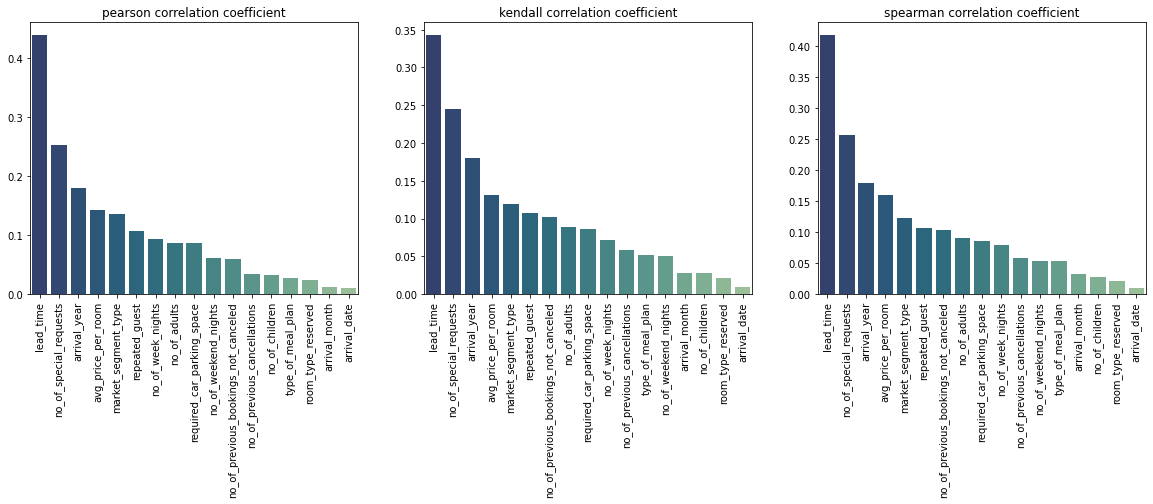

In [71]:
pearsonSeries = one_hot_scaled_df.corr().abs()['booking_status'].sort_values(ascending=False)
pearsonSeries = pearsonSeries.drop('booking_status')
kendallSeries = one_hot_scaled_df.corr(method='kendall').abs()['booking_status'].sort_values(ascending=False)
kendallSeries = kendallSeries.drop('booking_status')
spearmanSeries = one_hot_scaled_df.corr(method='spearman').abs()['booking_status'].sort_values(ascending=False)
spearmanSeries = spearmanSeries.drop('booking_status')

fig, axs = plt.subplots(ncols=3, figsize=(20, 5))

chart = sns.barplot(x=pearsonSeries.index, y=pearsonSeries.values, palette='crest_r', ax=axs[0])
_ = chart.set(title='pearson correlation coefficient')
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

chart = sns.barplot(x=kendallSeries.index, y=kendallSeries.values, palette='crest_r', ax=axs[1])
_ = chart.set(title='kendall correlation coefficient')
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

chart = sns.barplot(x=spearmanSeries.index, y=spearmanSeries.values, palette='crest_r', ax=axs[2])
_ = chart.set(title='spearman correlation coefficient')
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [72]:
X = one_hot_scaled_df.drop(['booking_status'], axis=1)
y = one_hot_scaled_df['booking_status']

In [73]:
RF_feature_selection = RandomForestClassifier()
RF_feature_selection.fit(X, y)

top = list(pd.concat([pd.DataFrame(X.columns, columns = ['Feature']), \
           pd.DataFrame(RF_feature_selection.feature_importances_, columns = ['Importance'])], axis = 1).\
           set_index('Feature').sort_values(by = 'Importance', ascending = False).head(7).index)

X = df[top]

X

,lead_time,avg_price_per_room,no_of_special_requests,arrival_date,arrival_month,market_segment_type,no_of_week_nights
0,224,65.00,0,2,10,3,2
1,5,106.68,1,6,11,4,3
2,1,60.00,0,28,2,4,1
3,211,100.00,0,20,5,4,2
4,48,94.50,0,11,4,4,1
...,...,...,...,...,...,...,...
36270,85,167.80,1,3,8,4,6
36271,228,90.95,2,17,10,4,3
36272,148,98.39,2,1,7,4,6
36273,63,94.50,0,21,4,4,3


In [77]:
y[4]

0.0

# Should we apply oversampling?

Text(0.5, 1.0, 'output Column Distribution')

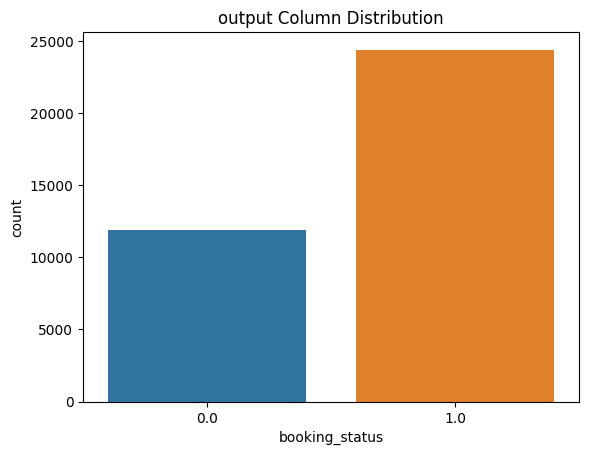

In [ ]:
# check output column class distribution
sns.countplot(x=y, data=one_hot_scaled_df).set_title("output Column Distribution")

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1)
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape 

((26118, 7), (2902, 7), (7255, 7), (26118,), (2902,), (7255,))

# Develop the Model

## Model 1

In [ ]:
model_1 = Sequential()

model_1.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model_1.add(Dropout(0.3))

model_1.add(Dense(128, activation='relu'))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dense(32, activation='relu'))
# model_1.add(Dense(16, aivation='relu'))
model_1.add(Dense(32, activation='relu'))
# model_1.add(Dense(16, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 45,313
Trainable params: 45,313
Non-traina

In [ ]:
# Train the model
history_1 = model_1.fit(x = X_train, y = y_train, batch_size = 256, epochs =500, validation_data = (X_val, y_val), verbose = 1)

Epoch 1/500
103/103 [==============================] - 1s 3ms/step - loss: 0.7038 - accuracy: 0.6819 - val_loss: 0.5526 - val_accuracy: 0.7409
Epoch 2/500
103/103 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.7205 - val_loss: 0.5219 - val_accuracy: 0.7460
Epoch 3/500
103/103 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.7293 - val_loss: 0.5231 - val_accuracy: 0.7350
Epoch 4/500
103/103 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7407 - val_loss: 0.5034 - val_accuracy: 0.7564
Epoch 5/500
103/103 [==============================] - 0s 2ms/step - loss: 0.5112 - accuracy: 0.7488 - val_loss: 0.4941 - val_accuracy: 0.7605
Epoch 6/500
103/103 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7514 - val_loss: 0.4862 - val_accuracy: 0.7619
Epoch 7/500
103/103 [==============================] - 0s 2ms/step - loss: 0.4986 - accuracy: 0.7538 - val_loss: 0.4754 - val_accuracy: 0.7733

In [ ]:
predicted_1 = np.where(model_1.predict(X_test) > 0.5, 1, 0)

print('accuracy is  = {}'.format(accuracy_score(predicted_1, y_test)),'\n')
print('precision is = {}'.format(precision_score(predicted_1, y_test)),'\n')
print('recall is    = {}'.format(recall_score(predicted_1, y_test)),'\n')
print('F1_Score is  = {}'.format(f1_score(predicted_1, y_test)),'\n')

227/227 [==============================] - 0s 492us/step
accuracy is  = 0.833631977946244 

precision is = 0.9377970655094028 

recall is    = 0.8335782512858193 

F1_Score is  = 0.8826218029757854 



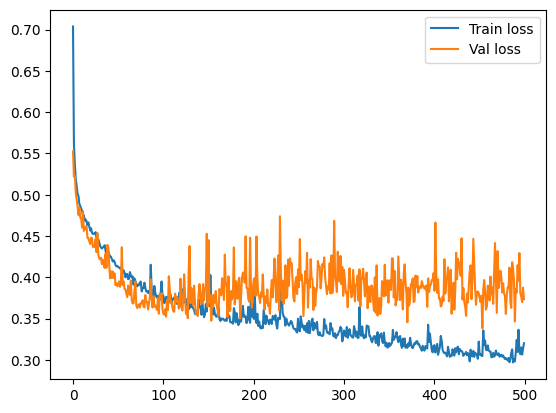

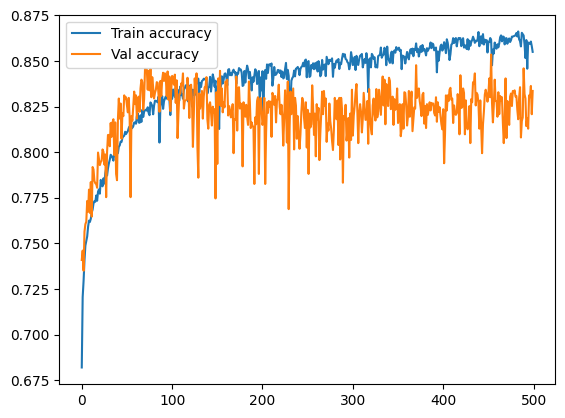

In [ ]:
# Plot the history
plt.plot(history_1.history['loss'], label = 'Train loss')
plt.plot(history_1.history['val_loss'], label = 'Val loss')
plt.legend()
plt.show()


plt.plot(history_1.history['accuracy'], label = 'Train accuracy')
plt.plot(history_1.history['val_accuracy'], label = 'Val accuracy')
plt.legend()
plt.show()

## Model 2

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample=SMOTE()
X, y= oversample.fit_resample(X,y)
counter=Counter(y)

In [ ]:
print(counter)

Counter({1.0: 24390, 0.0: 24390})


Text(0.5, 1.0, 'output Column Distribution')

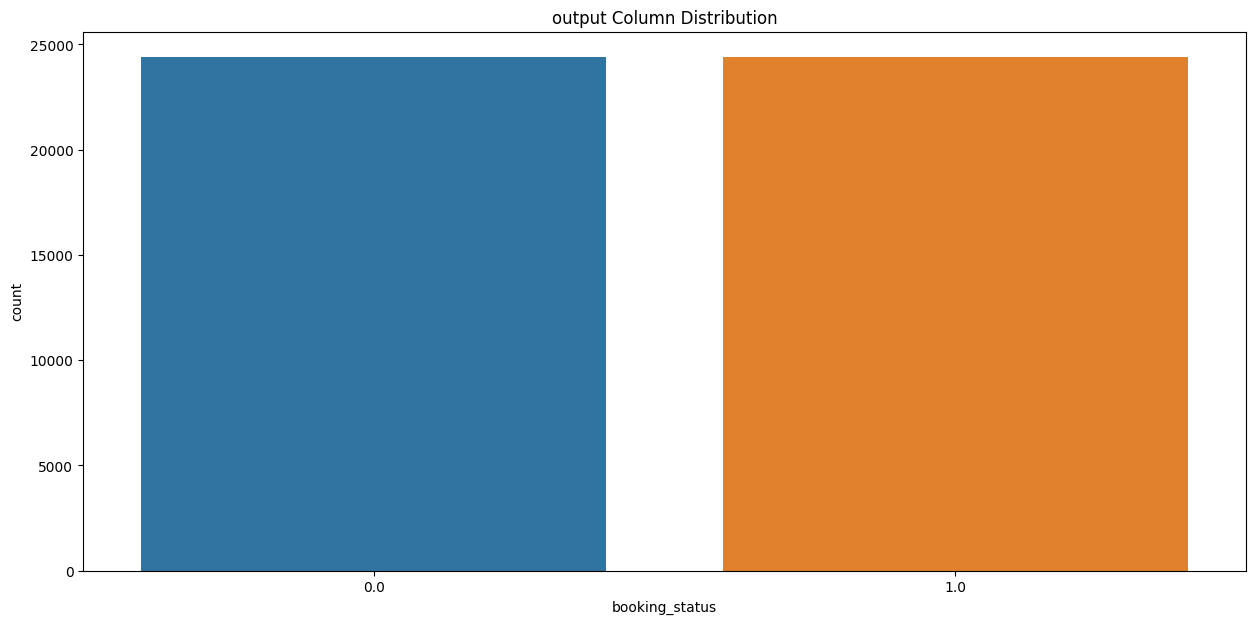

In [ ]:
sns.countplot(x=y, data=df).set_title("output Column Distribution")

In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1)

In [ ]:
model = Sequential()

model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2048      
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 32)                2080      
                                                                 
 dense_9 (Dense)             (None, 16)                528       
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 45,825
Trainable params: 45,825
Non-trai

In [ ]:
history = model.fit(x = X_train, y = y_train, validation_data = (X_val, y_val),  batch_size = 256, epochs = 1000)

Epoch 1/1000
138/138 [==============================] - 1s 2ms/step - loss: 0.5961 - accuracy: 0.6851 - val_loss: 0.5393 - val_accuracy: 0.7210
Epoch 2/1000
138/138 [==============================] - 0s 1ms/step - loss: 0.5346 - accuracy: 0.7256 - val_loss: 0.5056 - val_accuracy: 0.7420
Epoch 3/1000
138/138 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.7433 - val_loss: 0.5115 - val_accuracy: 0.7315
Epoch 4/1000
138/138 [==============================] - 0s 1ms/step - loss: 0.4952 - accuracy: 0.7585 - val_loss: 0.5007 - val_accuracy: 0.7438
Epoch 5/1000
138/138 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.7655 - val_loss: 0.4877 - val_accuracy: 0.7651
Epoch 6/1000
138/138 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7714 - val_loss: 0.4672 - val_accuracy: 0.7758
Epoch 7/1000
138/138 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.7735 - val_loss: 0.4564 - val_accuracy:

In [ ]:
y_pred=model.predict(X_test).round()
test_acc=accuracy_score(y_pred, y_test)

305/305 [==============================] - 0s 513us/step


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      4937
         1.0       0.87      0.88      0.87      4819

    accuracy                           0.87      9756
   macro avg       0.87      0.87      0.87      9756
weighted avg       0.87      0.87      0.87      9756



In [ ]:
predicted_1 = np.where(model.predict(X_test) > 0.5, 1, 0)

print('accuracy is  = {}'.format(accuracy_score(y_pred, y_test)),'\n')
print('precision is = {}'.format(precision_score(y_pred, y_test)),'\n')
print('recall is    = {}'.format(recall_score(y_pred, y_test)),'\n')
print('F1_Score is  = {}'.format(f1_score(y_pred, y_test)),'\n')

305/305 [==============================] - 0s 481us/step
accuracy is  = 0.8725912259122591 

precision is = 0.8651960784313726 

recall is    = 0.8790205436812617 

F1_Score is  = 0.872053525476068 



## Model 3

In [ ]:
model_3 = Sequential()
model_3.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))
model_3.add(Dense(64, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(128, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))
model_3.add(Dense(17, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.3))
model_3.add(Dense(32, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dense(1, activation='sigmoid'))

model_3.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1024)              8192      
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                65600     
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 128)              

In [ ]:
history_1 = model_3.fit(x = X_train, y = y_train, batch_size = 320, epochs =250, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/250
110/110 [==============================] - 2s 8ms/step - loss: 0.5976 - accuracy: 0.6821 - val_loss: 0.5947 - val_accuracy: 0.6785
Epoch 2/250
110/110 [==============================] - 1s 7ms/step - loss: 0.5473 - accuracy: 0.7120 - val_loss: 0.5194 - val_accuracy: 0.7475
Epoch 3/250
110/110 [==============================] - 1s 7ms/step - loss: 0.5018 - accuracy: 0.7554 - val_loss: 0.4733 - val_accuracy: 0.7783
Epoch 4/250
110/110 [==============================] - 1s 7ms/step - loss: 0.4744 - accuracy: 0.7784 - val_loss: 0.4613 - val_accuracy: 0.7897
Epoch 5/250
110/110 [==============================] - 1s 7ms/step - loss: 0.4610 - accuracy: 0.7906 - val_loss: 0.4373 - val_accuracy: 0.8064
Epoch 6/250
110/110 [==============================] - 1s 7ms/step - loss: 0.4562 - accuracy: 0.7936 - val_loss: 0.4195 - val_accuracy: 0.8146
Epoch 7/250
110/110 [==============================] - 1s 7ms/step - loss: 0.4475 - accuracy: 0.7993 - val_loss: 0.4224 - val_accuracy: 0.8121

305/305 [==============================] - 0s 622us/step
accuracy is  = 0.8683886838868389 

precision is = 0.8496732026143791 

recall is    = 0.8836023789294817 

F1_Score is  = 0.8663057059558518 



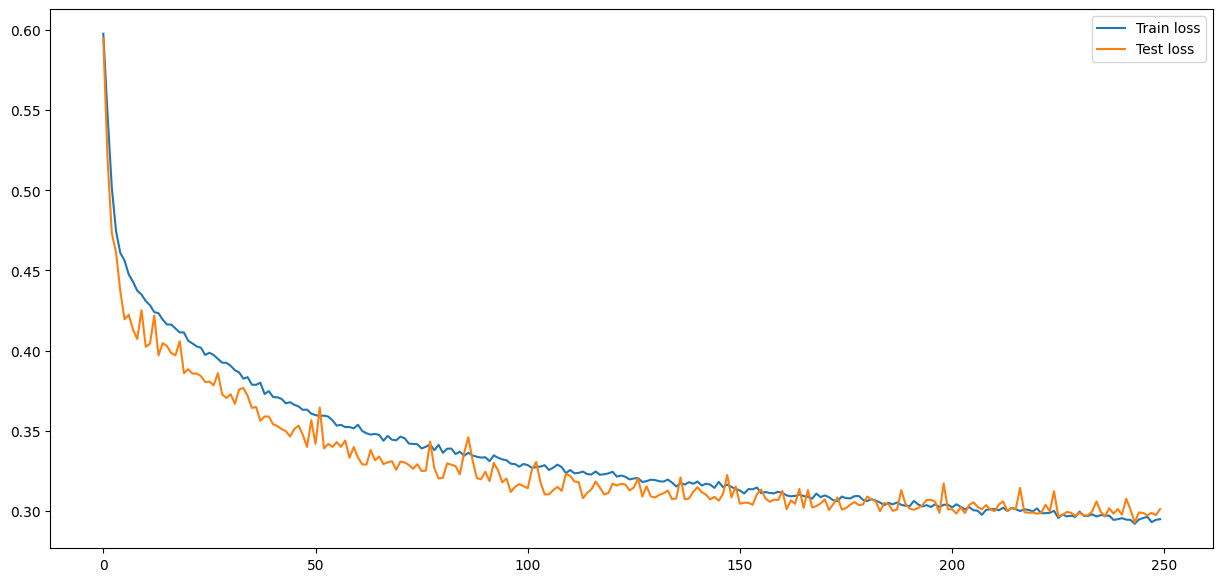

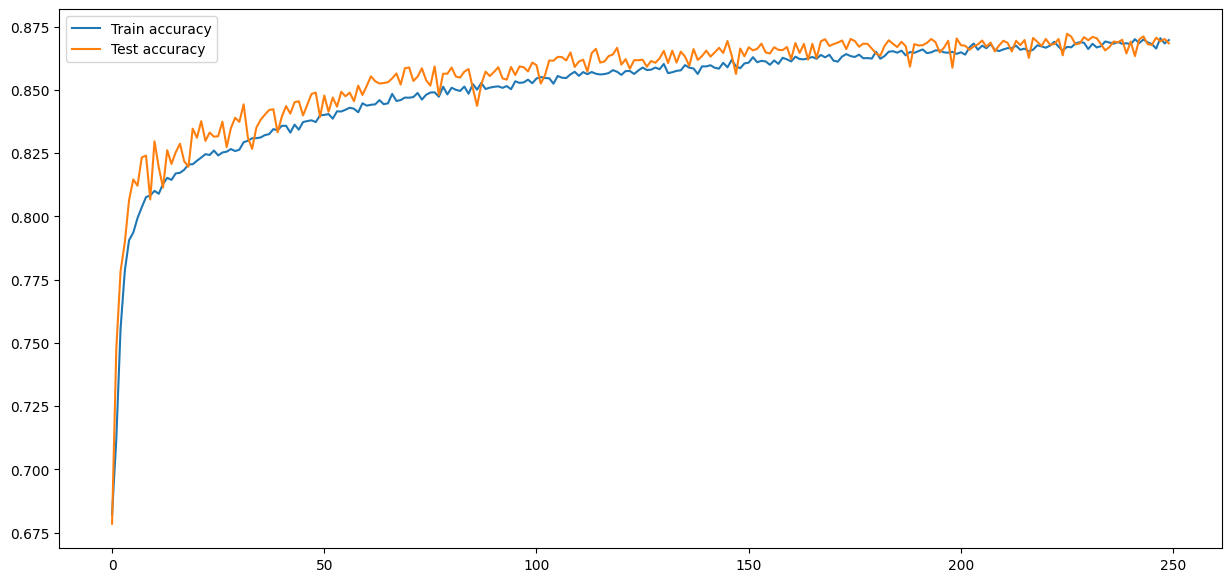

In [ ]:
predicted_3 = np.where(model_3.predict(X_test) > 0.5, 1, 0)

print('accuracy is  = {}'.format(accuracy_score(predicted_3, y_test)),'\n')
print('precision is = {}'.format(precision_score(predicted_3, y_test)),'\n')
print('recall is    = {}'.format(recall_score(predicted_3, y_test)),'\n')
print('F1_Score is  = {}'.format(f1_score(predicted_3, y_test)),'\n')

# Plot the history
plt.plot(history_1.history['loss'], label = 'Train loss')
plt.plot(history_1.history['val_loss'], label = 'Test loss')
plt.legend()
plt.show()

plt.plot(history_1.history['accuracy'], label = 'Train accuracy')
plt.plot(history_1.history['val_accuracy'], label = 'Test accuracy')
plt.legend()
plt.show()

## ML Models

In [ ]:
model_pipeline = []
model_pipeline.append(DecisionTreeClassifier(random_state = 42))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(LogisticRegression(random_state = 42))
model_pipeline.append(SVC(probability=True, C= 1, gamma= 0.01, kernel= 'rbf', random_state = 42))
model_pipeline.append(RandomForestClassifier(n_estimators=10, random_state = 42))
model_pipeline.append(SGDClassifier(loss = 'hinge', max_iter=1000, tol=1e-3, random_state = 42))

In [ ]:
model_list = ['DT','KNN','LR','SVM','RF','SGD']
acc_list = []
auc_list = []
cm_list = []

In [ ]:
for model in model_pipeline:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr,tpr),2))
    cm_list.append(metrics.confusion_matrix(y_test,y_pred))

In [ ]:
result_df = pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list})
result_df

,Model,Accuracy,AUC
0,DT,0.880381,0.88
1,KNN,0.826671,0.83
2,LR,0.793050,0.79
3,SVM,0.832411,0.83
4,RF,0.901804,0.90
5,SGD,0.774088,0.77


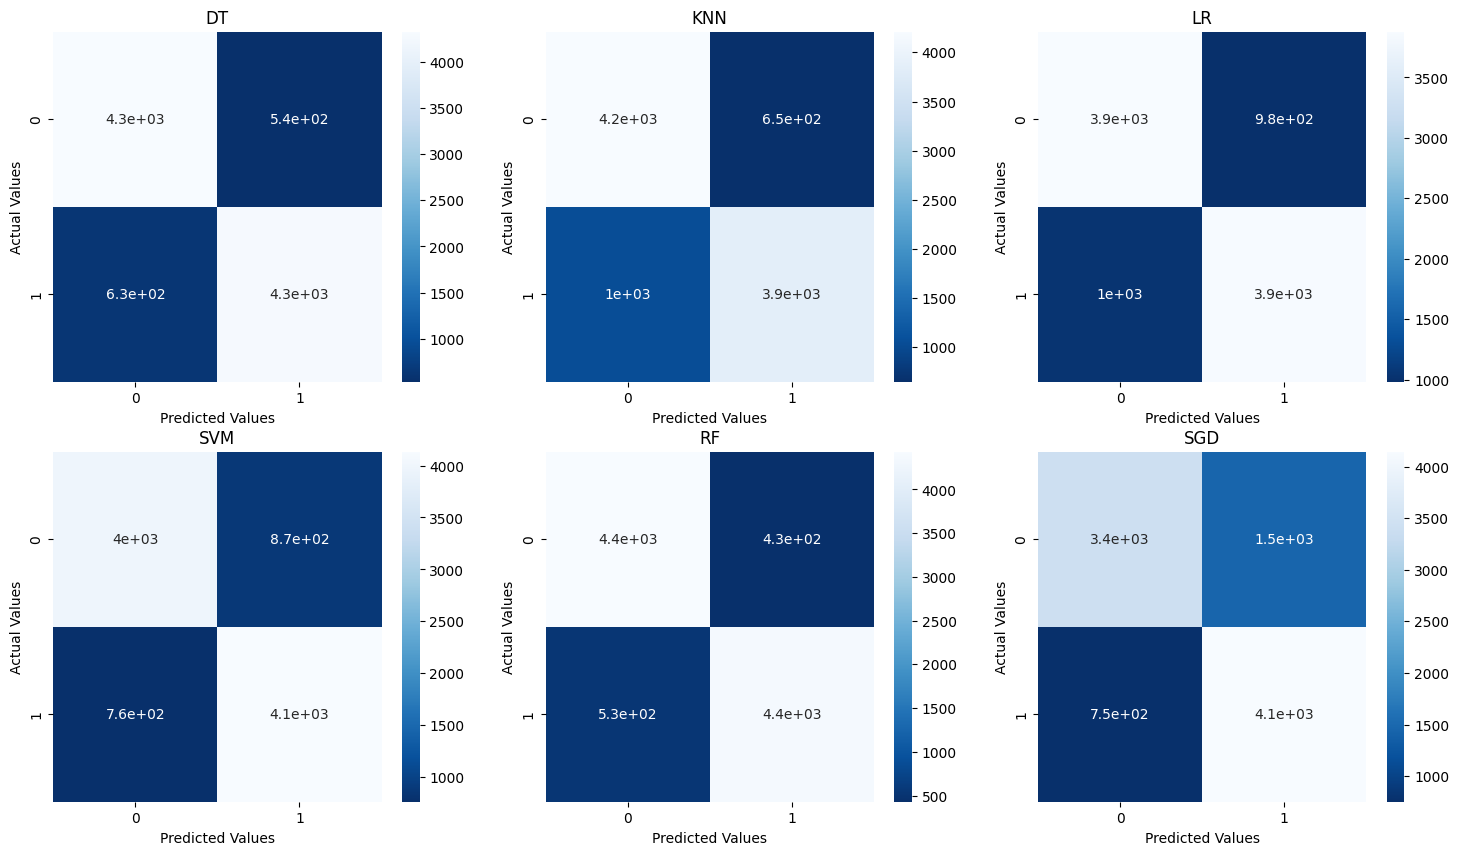

In [ ]:
fig = plt.figure(figsize = (18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True, cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

# PyTorch

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26635, 17), (8879, 17), (26635,), (8879,))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.sampler import WeightedRandomSampler
from torch.utils.data.sampler import RandomSampler
from torch.utils.data.sampler import SequentialSampler
from torch.utils.data.sampler import BatchSampler

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import time

In [ ]:
class HotelDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = HotelDataset(X_train.values, y_train.values)
test_dataset = HotelDataset(X_test.values, y_test.values)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
# test_loader shape
for X, y in test_loader:
    print(X.shape, y.shape)
    print(X_test.shape, X_train.shape)
    print(y_test.shape, y_train.shape)
    break

torch.Size([64, 17]) torch.Size([64])
(8879, 17) (26635, 17)
(8879,) (26635,)


In [ ]:
LEARNING_RATE = 0.01
EPOCHS = 100

input_size = X_train.shape[1]
hidden_size = 64
num_classes = 32

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 32)
        self.fc3 = nn.Linear(32, 128)
        self.fc4 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(p=0.2)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.logsoftmax(x)
        return x
        
model = Net()
# vanishing gradient
# model = Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE/100, weight_decay=1e-3)

In [ ]:
train_losses_1 = []
train_accs_1 = []
test_losses_1 = []
test_accs_1 = []

# Train the model
total_step = len(train_loader)
for epoch in range(EPOCHS):
    for i, (X, y) in enumerate(train_loader):
        # Run the forward pass
        outputs = model(X.float())
        loss = criterion(outputs, y.long())
        train_losses_1.append(loss.item())
        
        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track the accuracy
        total = y.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == y).sum().item()
        train_accs_1.append(correct / total)
        
    # Test the model
    # In test phase, we don't need to compute gradients (for memory efficiency)
    with torch.no_grad():
        correct = 0
        total = 0
        for X, y in test_loader:
            outputs = model(X.float())
            loss = criterion(outputs, y.long())
            test_losses_1.append(loss.item())
            
            total += y.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == y).sum().item()
            
        test_accs_1.append(correct / total)
        
    print ('Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
           .format(epoch+1, EPOCHS, loss.item(), (correct / total) * 100))


Epoch [1/100], Loss: 0.4984, Accuracy: 77.20%
Epoch [2/100], Loss: 0.4623, Accuracy: 79.60%
Epoch [3/100], Loss: 0.4974, Accuracy: 80.12%
Epoch [4/100], Loss: 0.5140, Accuracy: 81.19%
Epoch [5/100], Loss: 0.5017, Accuracy: 81.60%
Epoch [6/100], Loss: 0.4925, Accuracy: 81.39%
Epoch [7/100], Loss: 0.5235, Accuracy: 81.54%
Epoch [8/100], Loss: 0.5068, Accuracy: 81.87%
Epoch [9/100], Loss: 0.4998, Accuracy: 81.91%
Epoch [10/100], Loss: 0.5593, Accuracy: 82.09%
Epoch [11/100], Loss: 0.5511, Accuracy: 82.77%
Epoch [12/100], Loss: 0.4999, Accuracy: 83.00%
Epoch [13/100], Loss: 0.5790, Accuracy: 82.52%
Epoch [14/100], Loss: 0.5271, Accuracy: 82.80%
Epoch [15/100], Loss: 0.5254, Accuracy: 83.13%
Epoch [16/100], Loss: 0.5555, Accuracy: 82.78%
Epoch [17/100], Loss: 0.5616, Accuracy: 83.32%
Epoch [18/100], Loss: 0.5282, Accuracy: 83.12%
Epoch [19/100], Loss: 0.5356, Accuracy: 83.41%
Epoch [20/100], Loss: 0.5316, Accuracy: 83.60%
Epoch [21/100], Loss: 0.4878, Accuracy: 83.80%
Epoch [22/100], Loss: 

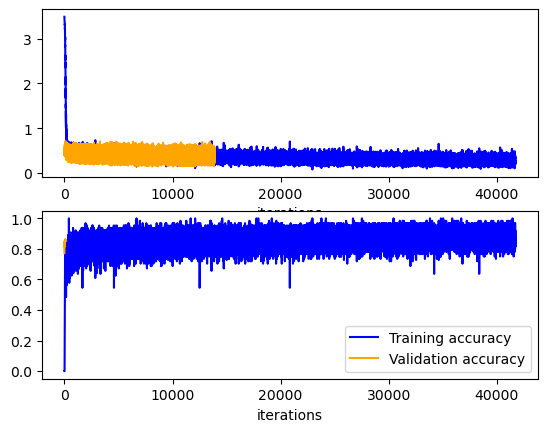

In [ ]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(train_losses_1, color='blue', label="Training loss")
ax[0].plot(test_losses_1, color='orange', label="Validation loss")
ax[0].set_xlabel("iterations")

ax[1].plot(train_accs_1, color='blue', label="Training accuracy")
ax[1].plot(test_accs_1, color='orange', label="Validation accuracy")
ax[1].set_xlabel("iterations")

plt.legend()
plt.show()

In [ ]:
# accuracy
correct = 0
total = 0
with torch.no_grad():
    for X, y in test_loader:
        outputs = model(X.float())
        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

Test Accuracy of the model on the 10000 test images: 85.94436310395315 %


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

def train(model, train_loader, optimizer, criterion):
    model.train()
    total_loss = 0
    total_correct = 0
    for X, y in train_loader:
        X = X.to(device)
        y = y.to(device)
        y_pred = model(X.float())
        loss = criterion(y_pred, y.long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_correct += (y_pred.argmax(1) == y).sum().item()
    return total_loss / len(train_loader), total_correct / len(train_loader.dataset)

def evaluate(model, test_loader, criterion):
    model.eval()
    total_loss = 0
    total_correct = 0
    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X.float())
            loss = criterion(y_pred, y.long())
            total_loss += loss.item()
            total_correct += (y_pred.argmax(1) == y).sum().item()
    return total_loss / len(test_loader), total_correct / len(test_loader.dataset)

In [ ]:
class HotelModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(HotelModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(1024, 64)
        self.fc3 = nn.Linear(64, 128)
        self.fc4 = nn.Linear(128, 17)
        self.fc5 = nn.Linear(17, 32)
        self.fc6 = nn.Linear(32, num_classes)
        self.dropout = nn.Dropout(p=0.3)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        x = self.dropout(x)
        x = F.relu(self.fc5(x))
        x = self.fc6(x)
        x = self.logsoftmax(x)
        return x


model = HotelModel(input_size, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE/10, weight_decay=1e-3)

# crossentropy
criterion = nn.CrossEntropyLoss()

In [ ]:
train_losses = []
train_accs = []
test_losses = []
test_accs = []

for epoch in range(EPOCHS):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    test_loss, test_acc = evaluate(model, test_loader, criterion)
    print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc*100:.2f}%")
    
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    test_losses.append(test_loss)
    test_accs.append(test_acc)

Epoch 1/100 | Train Loss: 0.5902 | Train Acc: 75.19% | Test Loss: 0.4161 | Test Acc: 81.46%
Epoch 2/100 | Train Loss: 0.4231 | Train Acc: 81.69% | Test Loss: 0.4004 | Test Acc: 82.32%
Epoch 3/100 | Train Loss: 0.4104 | Train Acc: 82.26% | Test Loss: 0.3963 | Test Acc: 82.26%
Epoch 4/100 | Train Loss: 0.4000 | Train Acc: 82.66% | Test Loss: 0.4005 | Test Acc: 82.28%
Epoch 5/100 | Train Loss: 0.3942 | Train Acc: 83.09% | Test Loss: 0.3874 | Test Acc: 82.62%
Epoch 6/100 | Train Loss: 0.3886 | Train Acc: 83.32% | Test Loss: 0.3859 | Test Acc: 83.14%
Epoch 7/100 | Train Loss: 0.3840 | Train Acc: 83.34% | Test Loss: 0.3777 | Test Acc: 83.50%
Epoch 8/100 | Train Loss: 0.3796 | Train Acc: 83.63% | Test Loss: 0.3725 | Test Acc: 83.39%
Epoch 9/100 | Train Loss: 0.3749 | Train Acc: 83.84% | Test Loss: 0.3664 | Test Acc: 83.77%
Epoch 10/100 | Train Loss: 0.3751 | Train Acc: 83.81% | Test Loss: 0.3720 | Test Acc: 84.25%
Epoch 11/100 | Train Loss: 0.3706 | Train Acc: 84.13% | Test Loss: 0.3686 | Tes

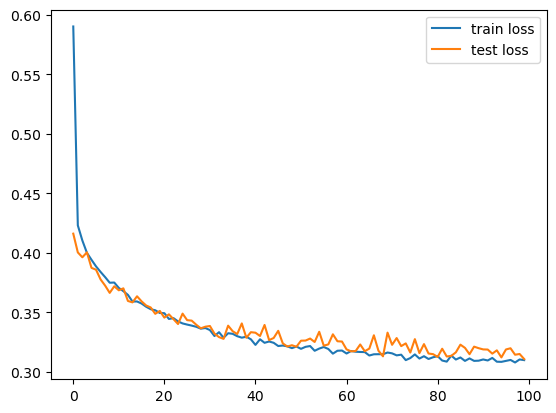

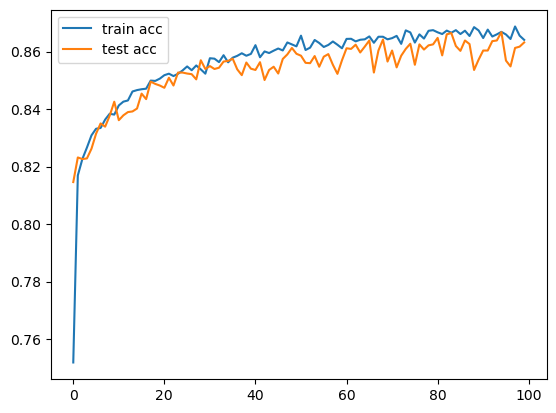

In [ ]:
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

plt.plot(train_accs, label='train acc')
plt.plot(test_accs, label='test acc')
plt.legend()
plt.show()

In [ ]:
def predict(model, test_loader):
    model.eval()
    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X.float())
            print(y_pred.argmax(1))
            print(y)

predict(model, test_loader)

tensor([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])
tensor([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1])
tensor([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1])
tensor([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])
tensor([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
# test the accuracy
def test_accuracy(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X.float())
            _, predicted = torch.max(y_pred.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

test_accuracy(model, test_loader)

Test Accuracy of the model on the 10000 test images: 86.31602657956977 %


In [ ]:
class HotelModelDNN(nn.Module):
    # use batch normalization
    def __init__(self, input_size, num_classes):
        super(HotelModelDNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 16)
        self.fc3 = nn.Linear(16, 128)
        self.fc4 = nn.Linear(128, 24)
        self.fc5 = nn.Linear(24, 34)
        self.fc6 = nn.Linear(34, num_classes)
        self.dropout = nn.Dropout(p=0.3)
        self.logsoftmax = nn.LogSoftmax(dim=1)
        self.batchnorm1 = nn.BatchNorm1d(128)
        self.batchnorm2 = nn.BatchNorm1d(16)
        self.batchnorm3 = nn.BatchNorm1d(128)
        self.batchnorm4 = nn.BatchNorm1d(24)
        self.batchnorm5 = nn.BatchNorm1d(34)

    def forward(self, x):
        x = F.relu(self.batchnorm1(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.batchnorm2(self.fc2(x)))
        x = F.relu(self.batchnorm3(self.fc3(x)))
        x = self.dropout(x)
        x = self.batchnorm4(self.fc4(x))
        x = self.dropout(x)
        x = F.relu(self.batchnorm5(self.fc5(x)))
        x = self.fc6(x)
        x = self.logsoftmax(x)
        return x

modelDNN = HotelModelDNN(input_size, num_classes)
modelDNN.to(device)

optimizer = torch.optim.SGD(
    modelDNN.parameters(),
    lr=LEARNING_RATE/10,
    momentum=0.9,
    dampening=0.02,
    weight_decay=0,
    nesterov=False
)
criterion = nn.CrossEntropyLoss()

In [ ]:
train_losses_DNN = []
train_accs_DNN = []
test_losses_DNN = []
test_accs_DNN = []

train_losses_DNN.clear()
train_accs_DNN.clear()
test_losses_DNN.clear()
test_accs_DNN.clear()

for epoch in range(EPOCHS):
    train_loss, train_acc = train(modelDNN, train_loader, optimizer, criterion)
    test_loss, test_acc = evaluate(modelDNN, test_loader, criterion)
    print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc*100:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc*100:.2f}%")
    
    train_losses_DNN.append(train_loss)
    train_accs_DNN.append(train_acc)
    test_losses_DNN.append(test_loss)
    test_accs_DNN.append(test_acc)

Epoch 1/100 | Train Loss: 1.2237 | Train Acc: 67.56% | Test Loss: 0.5840 | Test Acc: 79.72%
Epoch 2/100 | Train Loss: 0.5287 | Train Acc: 78.24% | Test Loss: 0.4842 | Test Acc: 80.75%
Epoch 3/100 | Train Loss: 0.4851 | Train Acc: 78.84% | Test Loss: 0.4599 | Test Acc: 80.29%
Epoch 4/100 | Train Loss: 0.4666 | Train Acc: 79.36% | Test Loss: 0.4376 | Test Acc: 81.28%
Epoch 5/100 | Train Loss: 0.4606 | Train Acc: 79.74% | Test Loss: 0.4289 | Test Acc: 81.46%
Epoch 6/100 | Train Loss: 0.4473 | Train Acc: 79.98% | Test Loss: 0.4215 | Test Acc: 81.42%
Epoch 7/100 | Train Loss: 0.4440 | Train Acc: 80.02% | Test Loss: 0.4161 | Test Acc: 81.81%
Epoch 8/100 | Train Loss: 0.4400 | Train Acc: 80.34% | Test Loss: 0.4110 | Test Acc: 81.87%
Epoch 9/100 | Train Loss: 0.4345 | Train Acc: 80.63% | Test Loss: 0.4063 | Test Acc: 81.96%
Epoch 10/100 | Train Loss: 0.4360 | Train Acc: 80.51% | Test Loss: 0.4044 | Test Acc: 82.31%
Epoch 11/100 | Train Loss: 0.4303 | Train Acc: 80.91% | Test Loss: 0.4030 | Tes

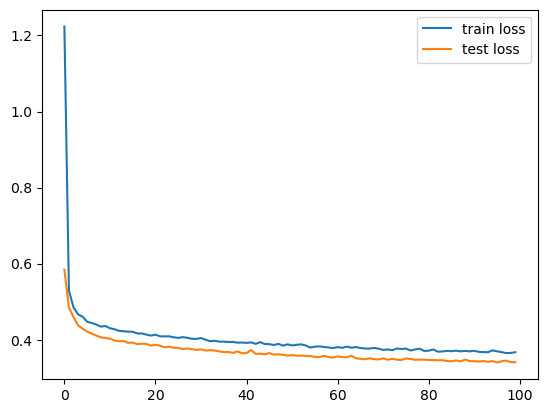

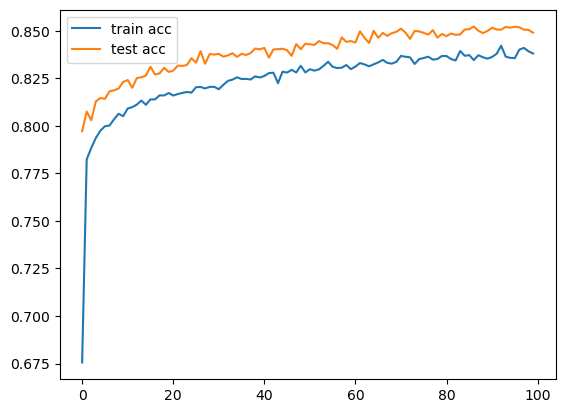

In [ ]:
plt.plot(train_losses_DNN, label='train loss')
plt.plot(test_losses_DNN, label='test loss')
plt.legend()
plt.show()

plt.plot(train_accs_DNN, label='train acc')
plt.plot(test_accs_DNN, label='test acc')
plt.legend()
plt.show()

In [ ]:
test_accuracy(modelDNN, test_loader)

NameError: name 'test_accuracy' is not defined